In [11]:
# Main
import os
import gc
import shutil
import time
import random
import cv2
import numpy as np 
import pandas as pd
import glob
from tqdm import tqdm
tqdm.pandas()
import re

# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from IPython.display import Image, display

import torch
from numba import cuda

In [2]:
provinces = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", "学", "O"]
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
             'X', 'Y', 'Z', 'O']
ads = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X',
       'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'O']

# list_sub = ["ccpd_base", "ccpd_fn", "ccpd_db", "ccpd_rotate", "ccpd_weather", "ccpd_blur"]
list_sub = ["ccpd_weather"]
BASE_PATH = "C:/Users/User/DeepLearning/Deep_Learning/final_project"

In [24]:
img_path = []
left_up_x = []
left_up_y = []
right_down_x = []
right_down_y = []
decoded_plate = []
location = []
license_images = []
for sub in list_sub:
    sub_path = os.path.join(BASE_PATH, sub)
    sub_files = glob.glob(os.path.join(sub_path, "*"))

    for file in sub_files:

        img_path.append(file)

        file_no_jpg = file.split("/")[-1][:-4]

        boundind_box = file_no_jpg.split("-")[2]
        left_up_bbox = boundind_box.split("_")[0]
        right_down_bbox = boundind_box.split("_")[1]
        left_up_x .append(int(left_up_bbox.split(",")[0]))
        left_up_y .append(int(left_up_bbox.split(",")[1]))
        right_down_x .append(int(right_down_bbox.split(",")[0]))
        right_down_y .append(int(right_down_bbox.split(",")[1]))



        temp = []
        plate_number =  file_no_jpg.split("-")[-3]
        plate_number_split =  plate_number.split('_')
        city = provinces[int(plate_number_split[0])]
        alp = alphabets[int(plate_number_split[1])]
        temp.append(city)
        temp.append(alp)
        
        for i in range(len(plate_number_split)-2):
            temp.append(ads[int(plate_number_split[i+2])])
        k = "".join(temp)
        decoded_plate.append(k)


        exver_img = cv2.imread(file)
        vertices = file_no_jpg.split("-")[3]
        split = vertices.split("_")

        x= (split[0].split(','))
        y= (split[1].split(','))
        z= (split[2].split(','))
        w= (split[3].split(','))
        coordinates= [int(x[0]), int(x[1]),int(y[0]),int(y[1]),int(z[0]),int(z[1]),int(w[0]),int(w[1])]
        location.append(coordinates)


        # exver_img = cv2.imread(file)
        # vertices = file_no_jpg.split("-")[3]
        # split = vertices.split("_")

        # x= (split[0].split(','))
        # y= (split[1].split(','))
        # z= (split[2].split(','))
        # w= (split[3].split(','))
        # coordinates= [int(x[0]), int(x[1]),int(y[0]),int(y[1]),int(z[0]),int(z[1]),int(w[0]),int(w[1])]
        # location.append(coordinates)
        # p1 = np.float32([[coordinates[4], coordinates[5]],
        #                 [coordinates[6], coordinates[7]],
        #                 [coordinates[2], coordinates[3]], 
        #                 [coordinates[0], coordinates[1]]])
        # p2 = np.float32([[0, 0],[exver_img.shape[1],0],[0,exver_img.shape[0]],[exver_img.shape[1],exver_img.shape[0]]])
        # M = cv2.getPerspectiveTransform(p1, p2)
        # outimg = cv2.warpPerspective(exver_img, M, exver_img.shape[1::-1])
        # resized = cv2.resize(outimg, (120,24), interpolation = cv2.INTER_AREA)
        # no_chinese_img = resized[:,width//8:]
        # license_images.append(resized)
        


        

r = [img_path,left_up_x,left_up_y,right_down_x,right_down_y,location,decoded_plate]
all_data = pd.DataFrame(r)
all_data = all_data.T
all_data.columns = ['img_path','x1','y1','x2','y2','location','decode_plate']
all_data= all_data[:5500]
all_data


,img_path,x1,y1,x2,y2,location,decode_plate
0,C:/Users/User/DeepLearning/Deep_Learning/final...,294,496,374,540,"[374, 533, 298, 540, 294, 503, 370, 496]",皖AD130W
1,C:/Users/User/DeepLearning/Deep_Learning/final...,304,542,411,577,"[407, 577, 304, 577, 308, 542, 411, 542]",皖AUT267
2,C:/Users/User/DeepLearning/Deep_Learning/final...,339,547,444,583,"[443, 583, 339, 582, 340, 547, 444, 548]",皖MZ4882
3,C:/Users/User/DeepLearning/Deep_Learning/final...,177,511,268,553,"[262, 553, 177, 545, 183, 511, 268, 519]",皖AVD028
4,C:/Users/User/DeepLearning/Deep_Learning/final...,402,426,497,467,"[497, 467, 403, 467, 402, 426, 496, 426]",皖RL222P
...,...,...,...,...,...,...,...
5495,C:/Users/User/DeepLearning/Deep_Learning/final...,96,584,372,688,"[367, 660, 96, 688, 101, 612, 372, 584]",皖AR8T97
5496,C:/Users/User/DeepLearning/Deep_Learning/final...,265,514,533,621,"[533, 621, 275, 592, 265, 514, 523, 543]",皖AL6M60
5497,C:/Users/User/DeepLearning/Deep_Learning/final...,282,536,566,637,"[543, 608, 282, 637, 305, 565, 566, 536]",皖A576X9
5498,C:/Users/User/DeepLearning/Deep_Learning/final...,64,606,309,723,"[309, 723, 76, 691, 64, 606, 297, 638]",皖ALF155


In [25]:
all_data['xmid'] = (all_data['x1'] + all_data['x2']) / (2*720)
all_data['ymid'] = (all_data['y1'] + all_data['y2']) / (2*1160)

all_data['bb_width'] = (all_data['x2'] - all_data['x1']) / 720
all_data['bb_height'] = (all_data['y2'] - all_data['y1']) / 1160
all_data

,img_path,x1,y1,x2,y2,location,decode_plate,xmid,ymid,bb_width,bb_height
0,C:/Users/User/DeepLearning/Deep_Learning/final...,294,496,374,540,"[374, 533, 298, 540, 294, 503, 370, 496]",皖AD130W,0.463889,0.446552,0.111111,0.037931
1,C:/Users/User/DeepLearning/Deep_Learning/final...,304,542,411,577,"[407, 577, 304, 577, 308, 542, 411, 542]",皖AUT267,0.496528,0.482328,0.148611,0.030172
2,C:/Users/User/DeepLearning/Deep_Learning/final...,339,547,444,583,"[443, 583, 339, 582, 340, 547, 444, 548]",皖MZ4882,0.54375,0.487069,0.145833,0.031034
3,C:/Users/User/DeepLearning/Deep_Learning/final...,177,511,268,553,"[262, 553, 177, 545, 183, 511, 268, 519]",皖AVD028,0.309028,0.458621,0.126389,0.036207
4,C:/Users/User/DeepLearning/Deep_Learning/final...,402,426,497,467,"[497, 467, 403, 467, 402, 426, 496, 426]",皖RL222P,0.624306,0.384914,0.131944,0.035345
...,...,...,...,...,...,...,...,...,...,...,...
5495,C:/Users/User/DeepLearning/Deep_Learning/final...,96,584,372,688,"[367, 660, 96, 688, 101, 612, 372, 584]",皖AR8T97,0.325,0.548276,0.383333,0.089655
5496,C:/Users/User/DeepLearning/Deep_Learning/final...,265,514,533,621,"[533, 621, 275, 592, 265, 514, 523, 543]",皖AL6M60,0.554167,0.489224,0.372222,0.092241
5497,C:/Users/User/DeepLearning/Deep_Learning/final...,282,536,566,637,"[543, 608, 282, 637, 305, 565, 566, 536]",皖A576X9,0.588889,0.505603,0.394444,0.087069
5498,C:/Users/User/DeepLearning/Deep_Learning/final...,64,606,309,723,"[309, 723, 76, 691, 64, 606, 297, 638]",皖ALF155,0.259028,0.572845,0.340278,0.100862


In [26]:
list_split = ["train"] * 5000
for i in range(5):
    list_split.extend(["val"]*50)
    list_split.extend(["test"]*50)
all_data ["split"] = list_split
all_data 

,img_path,x1,y1,x2,y2,location,decode_plate,xmid,ymid,bb_width,bb_height,split
0,C:/Users/User/DeepLearning/Deep_Learning/final...,294,496,374,540,"[374, 533, 298, 540, 294, 503, 370, 496]",皖AD130W,0.463889,0.446552,0.111111,0.037931,train
1,C:/Users/User/DeepLearning/Deep_Learning/final...,304,542,411,577,"[407, 577, 304, 577, 308, 542, 411, 542]",皖AUT267,0.496528,0.482328,0.148611,0.030172,train
2,C:/Users/User/DeepLearning/Deep_Learning/final...,339,547,444,583,"[443, 583, 339, 582, 340, 547, 444, 548]",皖MZ4882,0.54375,0.487069,0.145833,0.031034,train
3,C:/Users/User/DeepLearning/Deep_Learning/final...,177,511,268,553,"[262, 553, 177, 545, 183, 511, 268, 519]",皖AVD028,0.309028,0.458621,0.126389,0.036207,train
4,C:/Users/User/DeepLearning/Deep_Learning/final...,402,426,497,467,"[497, 467, 403, 467, 402, 426, 496, 426]",皖RL222P,0.624306,0.384914,0.131944,0.035345,train
...,...,...,...,...,...,...,...,...,...,...,...,...
5495,C:/Users/User/DeepLearning/Deep_Learning/final...,96,584,372,688,"[367, 660, 96, 688, 101, 612, 372, 584]",皖AR8T97,0.325,0.548276,0.383333,0.089655,test
5496,C:/Users/User/DeepLearning/Deep_Learning/final...,265,514,533,621,"[533, 621, 275, 592, 265, 514, 523, 543]",皖AL6M60,0.554167,0.489224,0.372222,0.092241,test
5497,C:/Users/User/DeepLearning/Deep_Learning/final...,282,536,566,637,"[543, 608, 282, 637, 305, 565, 566, 536]",皖A576X9,0.588889,0.505603,0.394444,0.087069,test
5498,C:/Users/User/DeepLearning/Deep_Learning/final...,64,606,309,723,"[309, 723, 76, 691, 64, 606, 297, 638]",皖ALF155,0.259028,0.572845,0.340278,0.100862,test


In [27]:
df_train = all_data [all_data["split"]=="train"].reset_index(drop=True)
df_train = df_train[["img_path", "x1", "y1", "x2", "y2",'location',"decode_plate"]]
df_train

,img_path,x1,y1,x2,y2,location,decode_plate
0,C:/Users/User/DeepLearning/Deep_Learning/final...,294,496,374,540,"[374, 533, 298, 540, 294, 503, 370, 496]",皖AD130W
1,C:/Users/User/DeepLearning/Deep_Learning/final...,304,542,411,577,"[407, 577, 304, 577, 308, 542, 411, 542]",皖AUT267
2,C:/Users/User/DeepLearning/Deep_Learning/final...,339,547,444,583,"[443, 583, 339, 582, 340, 547, 444, 548]",皖MZ4882
3,C:/Users/User/DeepLearning/Deep_Learning/final...,177,511,268,553,"[262, 553, 177, 545, 183, 511, 268, 519]",皖AVD028
4,C:/Users/User/DeepLearning/Deep_Learning/final...,402,426,497,467,"[497, 467, 403, 467, 402, 426, 496, 426]",皖RL222P
...,...,...,...,...,...,...,...
4995,C:/Users/User/DeepLearning/Deep_Learning/final...,182,507,459,605,"[459, 596, 197, 605, 182, 516, 444, 507]",皖Q05275
4996,C:/Users/User/DeepLearning/Deep_Learning/final...,258,493,437,645,"[430, 645, 258, 573, 265, 493, 437, 565]",皖AJ0S21
4997,C:/Users/User/DeepLearning/Deep_Learning/final...,387,485,566,637,"[566, 637, 388, 565, 387, 485, 565, 557]",皖A52A41
4998,C:/Users/User/DeepLearning/Deep_Learning/final...,146,519,423,617,"[423, 607, 148, 617, 146, 529, 421, 519]",皖AV0600


In [28]:
df_val = all_data [all_data["split"]=="val"].reset_index(drop=True)
df_val = df_val[["img_path", "x1", "y1", "x2", "y2","location","decode_plate"]]
df_val

,img_path,x1,y1,x2,y2,location,decode_plate
0,C:/Users/User/DeepLearning/Deep_Learning/final...,219,504,473,611,"[473, 598, 219, 611, 219, 517, 473, 504]",皖AV5A99
1,C:/Users/User/DeepLearning/Deep_Learning/final...,282,452,568,547,"[568, 533, 282, 547, 282, 466, 568, 452]",皖ADX498
2,C:/Users/User/DeepLearning/Deep_Learning/final...,153,523,439,618,"[439, 618, 156, 605, 153, 523, 436, 536]",皖A317C2
3,C:/Users/User/DeepLearning/Deep_Learning/final...,250,454,525,553,"[525, 542, 262, 553, 250, 465, 513, 454]",浙HFP512
4,C:/Users/User/DeepLearning/Deep_Learning/final...,155,439,447,532,"[441, 514, 155, 532, 161, 457, 447, 439]",皖AF5177
...,...,...,...,...,...,...,...
245,C:/Users/User/DeepLearning/Deep_Learning/final...,273,359,547,463,"[547, 442, 276, 463, 273, 380, 544, 359]",皖AC5S38
246,C:/Users/User/DeepLearning/Deep_Learning/final...,328,469,564,590,"[564, 590, 334, 572, 328, 469, 558, 487]",皖AD301Z
247,C:/Users/User/DeepLearning/Deep_Learning/final...,309,543,583,647,"[583, 647, 315, 627, 309, 543, 577, 563]",皖AL0L10
248,C:/Users/User/DeepLearning/Deep_Learning/final...,273,416,535,525,"[535, 500, 280, 525, 273, 441, 528, 416]",皖A4Q664


In [29]:
df_test = all_data [all_data["split"]=="test"].reset_index(drop=True)
df_test = df_test[["img_path", "x1", "y1", "x2", "y2","location","decode_plate"]]
df_test

,img_path,x1,y1,x2,y2,location,decode_plate
0,C:/Users/User/DeepLearning/Deep_Learning/final...,176,497,455,595,"[455, 595, 208, 575, 176, 497, 423, 517]",鄂AT2W80
1,C:/Users/User/DeepLearning/Deep_Learning/final...,213,444,469,551,"[448, 524, 213, 551, 234, 471, 469, 444]",皖AB967N
2,C:/Users/User/DeepLearning/Deep_Learning/final...,257,384,525,486,"[525, 486, 283, 457, 257, 384, 499, 413]",皖A25T29
3,C:/Users/User/DeepLearning/Deep_Learning/final...,201,476,493,570,"[491, 565, 201, 570, 203, 481, 493, 476]",皖AZW108
4,C:/Users/User/DeepLearning/Deep_Learning/final...,252,586,532,684,"[526, 684, 252, 680, 258, 586, 532, 590]",皖AZ2744
...,...,...,...,...,...,...,...
245,C:/Users/User/DeepLearning/Deep_Learning/final...,96,584,372,688,"[367, 660, 96, 688, 101, 612, 372, 584]",皖AR8T97
246,C:/Users/User/DeepLearning/Deep_Learning/final...,265,514,533,621,"[533, 621, 275, 592, 265, 514, 523, 543]",皖AL6M60
247,C:/Users/User/DeepLearning/Deep_Learning/final...,282,536,566,637,"[543, 608, 282, 637, 305, 565, 566, 536]",皖A576X9
248,C:/Users/User/DeepLearning/Deep_Learning/final...,64,606,309,723,"[309, 723, 76, 691, 64, 606, 297, 638]",皖ALF155


In [10]:
def image_and_text_yolo(split, all_data, dataset_path):
    df = all_data[all_data["split"]==split].reset_index(drop=True)
    folder_path = os.path.join(dataset_path, split)

    values = df[['img_path','xmid','ymid','bb_width','bb_height']].values
    for file_name, x, y, w, h in values:
        image_name = os.path.split(file_name)[-1]
        txt_name = os.path.splitext(image_name)[0]

        dst_image_path = os.path.join(folder_path, image_name)
        dst_label_file = os.path.join(folder_path, txt_name+'.txt')

        # Copy each image into the folder
        shutil.copy2(file_name, dst_image_path)

        # Generate .txt with label info
        label_txt = f'0 {x} {y} {w} {h}'
        with open(dst_label_file, 'w') as f:
            f.write(label_txt)

# Example usage:
dataset_path = "C:/Users/User/DeepLearning/Deep_Learning/final_project/datasets_weather"
image_and_text_yolo("train", all_data, dataset_path)
print("Train Dataset Created")
image_and_text_yolo("val", all_data, dataset_path)
print("Val Dataset Created")
image_and_text_yolo("test", all_data, dataset_path)
print("Test Dataset Created")

Train Dataset Created
Val Dataset Created
Test Dataset Created


In [13]:
%%writefile C:/Users/User/DeepLearning/Deep_Learning/final_project/datasets_weather.yaml
# Create Custom Dataset Configuration
train: C:/Users/User/DeepLearning/Deep_Learning/final_project/datasets_weather/train
val: C:/Users/User/DeepLearning/Deep_Learning/final_project/datasets_weather/val
test: C:/Users/User/DeepLearning/Deep_Learning/final_project/datasets_weather/test
    
nc: 1
    
names: [
    'license_plate'
]

Writing C:/Users/User/DeepLearning/Deep_Learning/final_project/datasets_weather.yaml


In [14]:
from GPUtil import showUtilization as gpu_usage

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()

Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% |  2% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  0% |  2% |


In [ ]:
# yolo train model=yolov8s.pt data="C:/Users/User/DeepLearning/Deep_Learning/final_project/datasets_weather.yaml" epochs=25 verbose=True batch=8

In [15]:
os.listdir("C:/Users/User/runs/detect/train3")

['args.yaml',
 'confusion_matrix.png',
 'confusion_matrix_normalized.png',
 'events.out.tfevents.1704956064.LAPTOP-C8E0O0BK.21912.0',
 'F1_curve.png',
 'labels.jpg',
 'labels_correlogram.jpg',
 'PR_curve.png',
 'P_curve.png',
 'results.csv',
 'results.png',
 'R_curve.png',
 'train_batch0.jpg',
 'train_batch1.jpg',
 'train_batch2.jpg',
 'train_batch9375.jpg',
 'train_batch9376.jpg',
 'train_batch9377.jpg',
 'val_batch0_labels.jpg',
 'val_batch0_pred.jpg',
 'val_batch1_labels.jpg',
 'val_batch1_pred.jpg',
 'val_batch2_labels.jpg',
 'val_batch2_pred.jpg',
 'weights']

In [16]:
training_results = pd.read_csv("C:/Users/User/runs/detect/train3/results.csv")
list_column = [col.strip() for col in training_results.columns]
training_results.columns = list_column

training_results

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,0.71752,0.69170,0.90437,0.99599,0.99372,0.99500,0.87247,0.52726,0.35913,0.86950,0.000666,0.000666,0.000666
1,2,0.64356,0.42554,0.87908,0.99120,0.99600,0.99492,0.89329,0.49369,0.31352,0.86198,0.001280,0.001280,0.001280
2,3,0.61260,0.38975,0.86850,0.99944,0.99600,0.99500,0.87754,0.46853,0.29349,0.83978,0.001841,0.001841,0.001841
3,4,0.57712,0.37046,0.86381,0.99932,0.99600,0.99500,0.91981,0.41599,0.26441,0.83070,0.001762,0.001762,0.001762
4,5,0.54872,0.35117,0.85575,0.99916,0.99600,0.99500,0.90708,0.44705,0.29306,0.85266,0.001762,0.001762,0.001762
5,6,0.52105,0.33453,0.84557,0.99994,1.00000,0.99500,0.91745,0.42511,0.25574,0.82853,0.001683,0.001683,0.001683
6,7,0.49435,0.31503,0.84337,0.99601,0.99966,0.99500,0.93936,0.38191,0.22652,0.82200,0.001604,0.001604,0.001604
7,8,0.47856,0.30623,0.83949,0.99965,1.00000,0.99500,0.94414,0.35421,0.21166,0.81575,0.001525,0.001525,0.001525
8,9,0.47238,0.29653,0.84009,0.99782,0.99600,0.99500,0.94028,0.36031,0.22979,0.81212,0.001446,0.001446,0.001446
9,10,0.45440,0.29039,0.83175,0.99978,1.00000,0.99500,0.95470,0.34684,0.20919,0.80868,0.001366,0.001366,0.001366


In [17]:
# Training and Validation Loss

# Create Subplot
fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=["Localization Loss", "Classification Loss", "Distributional Focal Loss"], 
)

# Configuration Plot
class PlotCFG:
    marker_size = 6.5
    line_size = 2
    train_color = "#1e3772"
    valid_color = "#2788f9"

loss_list = ["box_loss", "cls_loss", "dfl_loss"]
for i, loss in enumerate(loss_list):
    fig.add_trace(
        go.Scatter(
            x=np.arange(1, training_results.shape[0]+1), y=training_results["train/{}".format(loss)],
            mode="markers+lines",
            marker=dict(
                color=PlotCFG.train_color, size=PlotCFG.marker_size, line=dict(color="White", width=0.5)
            ),
            line=dict(color=PlotCFG.train_color, width=PlotCFG.line_size),
            name="Training"
        ), row=1, col=i+1
    )
    fig.add_trace(
        go.Scatter(
            x=np.arange(1, training_results.shape[0]+1), y=training_results["val/{}".format(loss)],
            mode="markers+lines",
            marker=dict(
                color=PlotCFG.valid_color, size=PlotCFG.marker_size, line=dict(color="White", width=0.5)
            ),
            line=dict(color=PlotCFG.valid_color, width=PlotCFG.line_size),
            name="Validation"
        ), row=1, col=i+1
    )

# Update Axes
ticklabels = ["Box Loss", "Cls Loss", "DFL Loss"]
for i, ticklabel in enumerate(ticklabels):
    fig.update_xaxes(title="Epochs", linecolor="Black", ticks="outside", row=1, col=i+1)
    fig.update_yaxes(title=ticklabel, linecolor="Black", ticks="outside", row=1, col=i+1)

# Update Layout
fig.update_layout(
    title="Training and Validation Loss", title_x=0.5, font_family="Trebuchet MS",
    width=950, height=350,
    showlegend=False,
    plot_bgcolor="White",
    paper_bgcolor="White"
)

# Show
fig.show(iframe_connected=True)

In [30]:
from ultralytics import YOLO
yolo_model = YOLO('C:/Users/User/runs/detect/train3/weights/best.pt')

# Move the model to CPU
yolo_model = yolo_model.to('cpu')

# Rest of your code remains the same
bbox_results = yolo_model.predict(list(df_test["img_path"]), verbose=False)
all_box_list = []
all_conf_list = []

for bbox_result in bbox_results:
    boxes = bbox_result.boxes
    box_list = []
    conf_list = []

    for box in boxes:
        box_data = box.data[0][:4]
        box_data = [int(x) for x in box_data]
        conf = round(float(box.conf), 2)

        if conf >= 0.5:
            box_list.append(box_data)
            conf_list.append(conf)

    all_box_list.append(box_list)
    all_conf_list.append(conf_list)

df_test["pred_bbox"] = all_box_list
df_test["confidence"] = all_conf_list
df_test


,img_path,x1,y1,x2,y2,location,decode_plate,pred_bbox,confidence
0,C:/Users/User/DeepLearning/Deep_Learning/final...,176,497,455,595,"[455, 595, 208, 575, 176, 497, 423, 517]",鄂AT2W80,"[[177, 493, 454, 597]]",[0.94]
1,C:/Users/User/DeepLearning/Deep_Learning/final...,213,444,469,551,"[448, 524, 213, 551, 234, 471, 469, 444]",皖AB967N,"[[212, 443, 469, 551]]",[0.94]
2,C:/Users/User/DeepLearning/Deep_Learning/final...,257,384,525,486,"[525, 486, 283, 457, 257, 384, 499, 413]",皖A25T29,"[[255, 385, 523, 487]]",[0.93]
3,C:/Users/User/DeepLearning/Deep_Learning/final...,201,476,493,570,"[491, 565, 201, 570, 203, 481, 493, 476]",皖AZW108,"[[198, 476, 490, 570]]",[0.93]
4,C:/Users/User/DeepLearning/Deep_Learning/final...,252,586,532,684,"[526, 684, 252, 680, 258, 586, 532, 590]",皖AZ2744,"[[255, 587, 529, 680]]",[0.95]
...,...,...,...,...,...,...,...,...,...
245,C:/Users/User/DeepLearning/Deep_Learning/final...,96,584,372,688,"[367, 660, 96, 688, 101, 612, 372, 584]",皖AR8T97,"[[95, 584, 372, 687]]",[0.93]
246,C:/Users/User/DeepLearning/Deep_Learning/final...,265,514,533,621,"[533, 621, 275, 592, 265, 514, 523, 543]",皖AL6M60,"[[268, 515, 530, 620]]",[0.95]
247,C:/Users/User/DeepLearning/Deep_Learning/final...,282,536,566,637,"[543, 608, 282, 637, 305, 565, 566, 536]",皖A576X9,"[[277, 534, 570, 638]]",[0.92]
248,C:/Users/User/DeepLearning/Deep_Learning/final...,64,606,309,723,"[309, 723, 76, 691, 64, 606, 297, 638]",皖ALF155,"[[62, 606, 307, 721]]",[0.94]


C:/Users/User/DeepLearning/Deep_Learning/final_project\ccpd_weather\0328-2_6-273,493_545,594-545,594_279,581_273,493_539,506-0_0_11_31_31_24_6-87-67.jpg


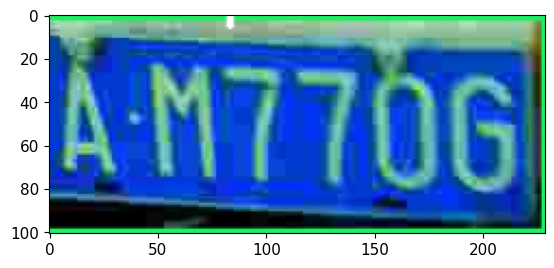

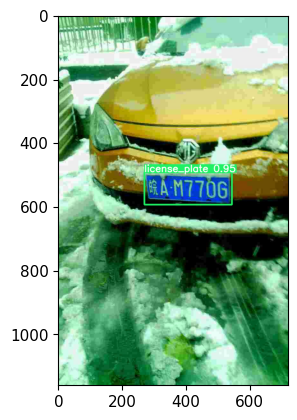

C:/Users/User/DeepLearning/Deep_Learning/final_project\ccpd_weather\0329-0_1-188,516_475,612-471,612_188,609_192,516_475,519-0_0_23_31_23_29_31-63-38.jpg


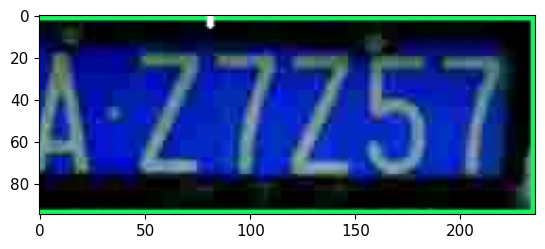

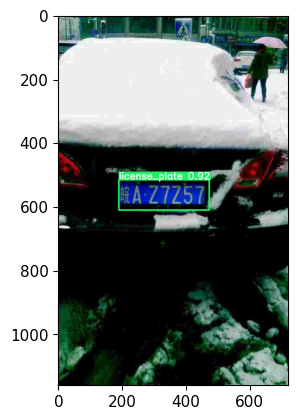

C:/Users/User/DeepLearning/Deep_Learning/final_project\ccpd_weather\0329-1_2-284,529_580,622-573,622_284,612_291,529_580,539-0_0_33_30_27_9_29-106-115.jpg


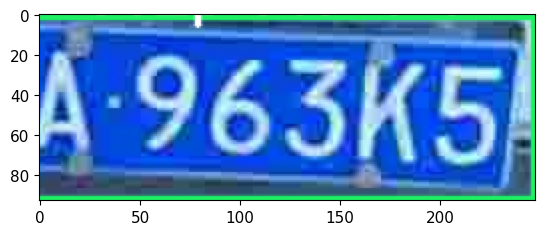

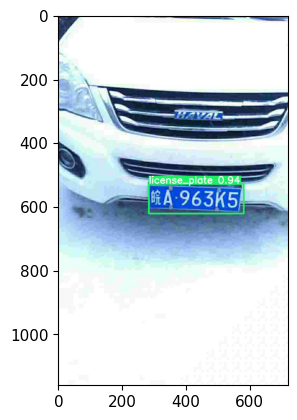

In [56]:
%matplotlib inline
from ultralytics.utils.plotting import Annotator

def show_plate_detection(idx):
    # Original Image
    ori_path = df_test["img_path"][idx]
    print(ori_path)
    ori_image = cv2.imread(ori_path)
    ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

    # Annotate Box
    annotator = Annotator(ori_image)
    boxes = df_test["pred_bbox"][idx]
    confs = df_test["confidence"][idx]
    for i, box in enumerate(boxes):
        annotator.box_label(box=box, label="license_plate " + (str(confs[i])), color=(30, 240, 100))

        # Get Plate Object
        x1, y1, x2, y2 = box
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        roi = ori_image[y1:y2, x1:x2]
        roi = roi[:, (x2-x1) // 6:]
        
        plt.imshow(roi)
        plt.show()

    # Show Image
    frame = annotator.result()
    plt.imshow(frame)
    plt.show()

idxs = [20,30,40]
for idx in idxs:
    show_plate_detection(idx)

In [53]:
from cnocr import CnOcr

def get_text_cnocr(idx):
    ori_path = df_test["img_path"][idx]
    ori_image = cv2.imread(ori_path)
    ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)
    cnocr_model = CnOcr()
    text_list = []
    bboxs = df_test["pred_bbox"][idx]
    for bbox in bboxs:
        # Crop Image with Bounding Box
        crop_image = ori_image[bbox[1]:bbox[3], bbox[0]:bbox[2]]
        crop_image = crop_image[:, (bbox[2]-bbox[0])//6:]
        
        # Extract Plate Number
        text_output = cnocr_model.ocr(crop_image)
        if(len(text_output)>0):
            text = text_output[0]["text"]
            
            # Clean Text
            del_punc_list = [" ", "·", ":", "-"]
            clean_text = re.sub(r"[ ·:-]", "", text)
            clean_text = clean_text.replace("O", "0")
            clean_text = clean_text.replace("I", "1")
            clean_text = clean_text.upper()
            text_list.append(clean_text)
            
    return text_list

In [54]:
idxs = list(np.arange(0, 250))
text_results = tqdm([get_text_cnocr(idx) for idx in idxs])
text_results = [text[0] if len(text)>0 else "" for text in text_results]
df_test["pred_plate_number"] = text_results
df_test

100%|██████████| 250/250 [00:00<?, ?it/s]


,img_path,x1,y1,x2,y2,location,decode_plate,pred_bbox,confidence,pred_plate_number
0,C:/Users/User/DeepLearning/Deep_Learning/final...,176,497,455,595,"[455, 595, 208, 575, 176, 497, 423, 517]",鄂AT2W80,"[[177, 493, 454, 597]]",[0.94],AA280
1,C:/Users/User/DeepLearning/Deep_Learning/final...,213,444,469,551,"[448, 524, 213, 551, 234, 471, 469, 444]",皖AB967N,"[[212, 443, 469, 551]]",[0.94],8967N
2,C:/Users/User/DeepLearning/Deep_Learning/final...,257,384,525,486,"[525, 486, 283, 457, 257, 384, 499, 413]",皖A25T29,"[[255, 385, 523, 487]]",[0.93],25129
3,C:/Users/User/DeepLearning/Deep_Learning/final...,201,476,493,570,"[491, 565, 201, 570, 203, 481, 493, 476]",皖AZW108,"[[198, 476, 490, 570]]",[0.93],Z1108
4,C:/Users/User/DeepLearning/Deep_Learning/final...,252,586,532,684,"[526, 684, 252, 680, 258, 586, 532, 590]",皖AZ2744,"[[255, 587, 529, 680]]",[0.95],72744
...,...,...,...,...,...,...,...,...,...,...
245,C:/Users/User/DeepLearning/Deep_Learning/final...,96,584,372,688,"[367, 660, 96, 688, 101, 612, 372, 584]",皖AR8T97,"[[95, 584, 372, 687]]",[0.93],AR8T97
246,C:/Users/User/DeepLearning/Deep_Learning/final...,265,514,533,621,"[533, 621, 275, 592, 265, 514, 523, 543]",皖AL6M60,"[[268, 515, 530, 620]]",[0.95],AL6M60
247,C:/Users/User/DeepLearning/Deep_Learning/final...,282,536,566,637,"[543, 608, 282, 637, 305, 565, 566, 536]",皖A576X9,"[[277, 534, 570, 638]]",[0.92],457619
248,C:/Users/User/DeepLearning/Deep_Learning/final...,64,606,309,723,"[309, 723, 76, 691, 64, 606, 297, 638]",皖ALF155,"[[62, 606, 307, 721]]",[0.94],MLF155


In [58]:
from sklearn.metrics import accuracy_score
no_chinese = []
for i in range(250):
    no_chinese.append(df_test['decode_plate'][i][1:])

df_test['no_chinese'] = no_chinese
df_test 

,img_path,x1,y1,x2,y2,...,decode_plate,pred_bbox,confidence,pred_plate_number,no_chinese
0,C:/Users/User/DeepLearning/Deep_Learning/final...,176,497,455,595,...,鄂AT2W80,"[[177, 493, 454, 597]]",[0.94],AA280,AT2W80
1,C:/Users/User/DeepLearning/Deep_Learning/final...,213,444,469,551,...,皖AB967N,"[[212, 443, 469, 551]]",[0.94],8967N,AB967N
2,C:/Users/User/DeepLearning/Deep_Learning/final...,257,384,525,486,...,皖A25T29,"[[255, 385, 523, 487]]",[0.93],25129,A25T29
3,C:/Users/User/DeepLearning/Deep_Learning/final...,201,476,493,570,...,皖AZW108,"[[198, 476, 490, 570]]",[0.93],Z1108,AZW108
4,C:/Users/User/DeepLearning/Deep_Learning/final...,252,586,532,684,...,皖AZ2744,"[[255, 587, 529, 680]]",[0.95],72744,AZ2744
...,...,...,...,...,...,...,...,...,...,...,...
245,C:/Users/User/DeepLearning/Deep_Learning/final...,96,584,372,688,...,皖AR8T97,"[[95, 584, 372, 687]]",[0.93],AR8T97,AR8T97
246,C:/Users/User/DeepLearning/Deep_Learning/final...,265,514,533,621,...,皖AL6M60,"[[268, 515, 530, 620]]",[0.95],AL6M60,AL6M60
247,C:/Users/User/DeepLearning/Deep_Learning/final...,282,536,566,637,...,皖A576X9,"[[277, 534, 570, 638]]",[0.92],457619,A576X9
248,C:/Users/User/DeepLearning/Deep_Learning/final...,64,606,309,723,...,皖ALF155,"[[62, 606, 307, 721]]",[0.94],MLF155,ALF155


In [60]:
test_accuracy = accuracy_score(no_chinese, df_test['pred_plate_number'])
print(test_accuracy)

0.396


In [61]:
def get_text_cnocr(idx):
    ori_path = df_test["img_path"][idx]
    ori_image = cv2.imread(ori_path)
    ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)
    cnocr_model = CnOcr()
    text_list = []
    bboxs = df_test["pred_bbox"][idx]
    for bbox in bboxs:
        # Crop Image with Bounding Box
        crop_image = ori_image[bbox[1]:bbox[3], bbox[0]:bbox[2]]
        
        # Extract Plate Number
        text_output = cnocr_model.ocr(crop_image)
        if(len(text_output)>0):
            text = text_output[0]["text"]
            
            # Clean Text
            del_punc_list = [" ", "·", ":", "-"]
            clean_text = re.sub(r"[ ·:-]", "", text)
            clean_text = clean_text.replace("O", "0")
            clean_text = clean_text.replace("I", "1")
            clean_text = clean_text.upper()
            text_list.append(clean_text)
            
    return text_list
idxs = list(np.arange(0, 250))
text_results = tqdm([get_text_cnocr(idx) for idx in idxs])
text_results = [text[0] if len(text)>0 else "" for text in text_results]
df_test["ch_pred_plate_number"] = text_results
df_test

100%|██████████| 250/250 [00:00<?, ?it/s]


,img_path,x1,y1,x2,y2,...,pred_bbox,confidence,pred_plate_number,no_chinese,ch_pred_plate_number
0,C:/Users/User/DeepLearning/Deep_Learning/final...,176,497,455,595,...,"[[177, 493, 454, 597]]",[0.94],AA280,AT2W80,EA2N80
1,C:/Users/User/DeepLearning/Deep_Learning/final...,213,444,469,551,...,"[[212, 443, 469, 551]]",[0.94],8967N,AB967N,游4B967M
2,C:/Users/User/DeepLearning/Deep_Learning/final...,257,384,525,486,...,"[[255, 385, 523, 487]]",[0.93],25129,A25T29,25129
3,C:/Users/User/DeepLearning/Deep_Learning/final...,201,476,493,570,...,"[[198, 476, 490, 570]]",[0.93],Z1108,AZW108,顺AZ1108
4,C:/Users/User/DeepLearning/Deep_Learning/final...,252,586,532,684,...,"[[255, 587, 529, 680]]",[0.95],72744,AZ2744,皖AZ2744
...,...,...,...,...,...,...,...,...,...,...,...
245,C:/Users/User/DeepLearning/Deep_Learning/final...,96,584,372,688,...,"[[95, 584, 372, 687]]",[0.93],AR8T97,AR8T97,皖AR8T97
246,C:/Users/User/DeepLearning/Deep_Learning/final...,265,514,533,621,...,"[[268, 515, 530, 620]]",[0.95],AL6M60,AL6M60,陈AL6M60
247,C:/Users/User/DeepLearning/Deep_Learning/final...,282,536,566,637,...,"[[277, 534, 570, 638]]",[0.92],457619,A576X9,杭4576X9
248,C:/Users/User/DeepLearning/Deep_Learning/final...,64,606,309,723,...,"[[62, 606, 307, 721]]",[0.94],MLF155,ALF155,ALF155


In [62]:
test_accuracy = accuracy_score(df_test['decode_plate'], df_test['ch_pred_plate_number'])
print(test_accuracy)

0.376
